In [1]:
# Diabetes diagnosis project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The following dataset was obtained from the National Institute of Qandli Diabetes and Kidney Diseases in India. The aim is to predict the presence or absence of diabetes in patients based on diagnostic measurements.

Content

The dataset contains data from female patients aged at least 21 years old.

Columns info
- Pregnancies: Number of pregnancies
- Glucose: Glucose test result
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Thickness of triceps skin fold (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg / (height in meters)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class (0 - no diabetes, 1 - diabetes)

In [66]:
# Data
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# check shape
df.shape

(768, 9)

In [18]:
# check for NaN values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
df.Outcome.value_counts() # do not need normalize we have small data


0    500
1    268
Name: Outcome, dtype: int64

# Visualization and Correlation

In [20]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [68]:
df.corrwith(df.Outcome).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

# Train, test

In [69]:
x = df.drop('Outcome', axis=1)
y = df.Outcome

In [70]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=30)

# ML

In [72]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k

knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

In [73]:
# Model-check
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.44

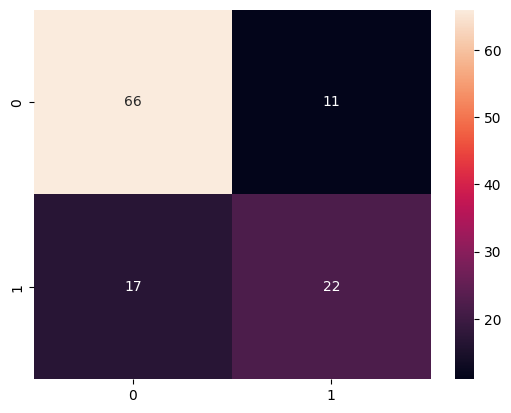

In [74]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [75]:
# Precision, recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision}\n{recall}\n{f1}\n{accuracy}")

0.6666666666666666
0.5641025641025641
0.611111111111111
0.7586206896551724


In [76]:
# Check with Cross Validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X=x, y=y, cv=5)

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768



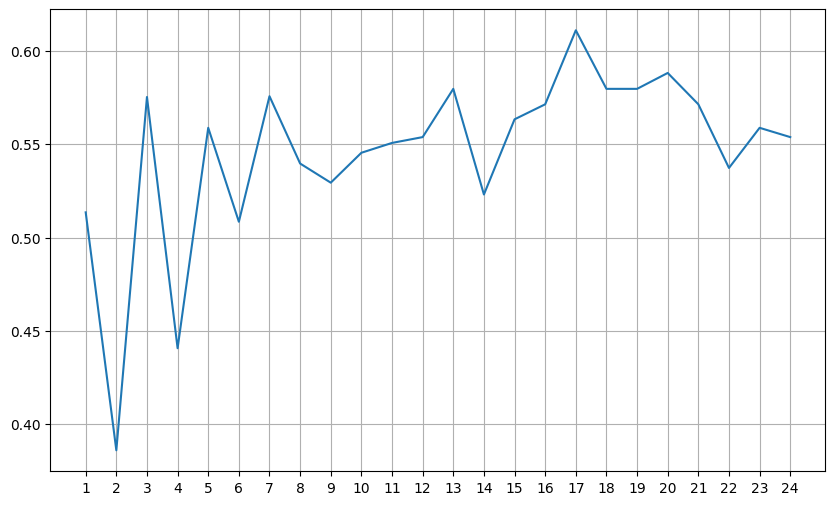

In [77]:
# Finding best K
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    f1.append(f1_score(y_test, y_predict))
plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [78]:
# with Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gcsv = GridSearchCV(knn, param_grid, cv=5)
knn_gcsv.fit(x,y)

knn_gcsv.best_params_

{'n_neighbors': 17}

In [64]:
knn_gcsv.best_score_

0.7669892199303965

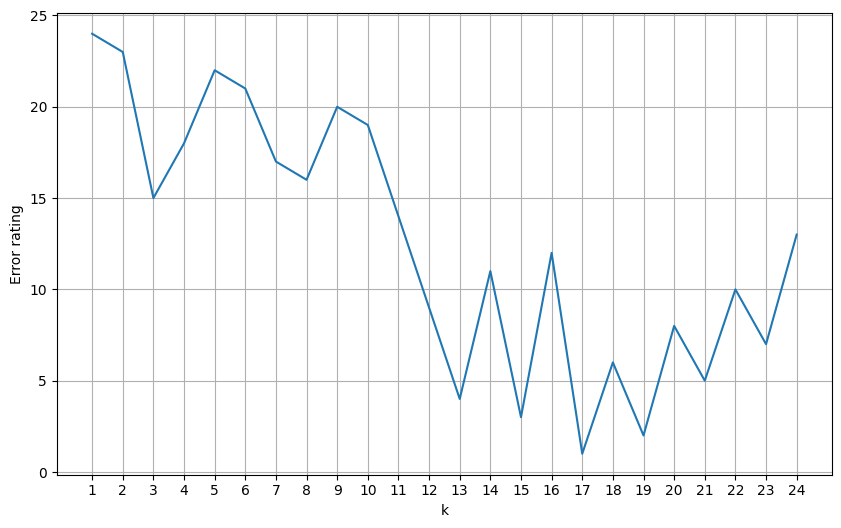

In [65]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gcsv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Error rating")
plt.grid()
plt.show()

In [79]:
# Saving
import joblib

filename = 'knn_model.jbl'
joblib.dump(knn, filename)

['knn_model.jbl']